In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
census_geo = gpd.read_file('../data/census_income.geojson')

In [3]:
print(census_geo.crs)
census_geo.head()

EPSG:4326


,geoid,name,B19001001,"B19001001, Error",B19001002,"B19001002, Error",B19001003,"B19001003, Error",B19001004,"B19001004, Error",...,"B19001013, Error",B19001014,"B19001014, Error",B19001015,"B19001015, Error",B19001016,"B19001016, Error",B19001017,"B19001017, Error",geometry
0,04000US47,Tennessee,2713635.0,7405.0,144639.0,2807.0,122212.0,3595.0,111419.0,2673.0,...,4514.0,257232.0,4293.0,169567.0,3100.0,182209.0,3522.0,197980.0,3847.0,"MULTIPOLYGON (((-83.98762 36.58947, -83.98724 ..."
1,14000US47001020100,"Census Tract 201, Anderson, TN",1531.0,225.0,156.0,90.0,74.0,52.0,41.0,42.0,...,53.0,125.0,79.0,16.0,18.0,46.0,33.0,11.0,16.0,"MULTIPOLYGON (((-84.32016 35.99186, -84.32008 ..."
2,14000US47001020201,"Census Tract 202.01, Anderson, TN",2029.0,160.0,93.0,73.0,28.0,35.0,26.0,30.0,...,73.0,242.0,94.0,195.0,114.0,256.0,81.0,368.0,140.0,"MULTIPOLYGON (((-84.24333 36.00161, -84.24330 ..."
3,14000US47001020202,"Census Tract 202.02, Anderson, TN",1951.0,235.0,235.0,127.0,159.0,126.0,7.0,13.0,...,97.0,134.0,77.0,129.0,106.0,295.0,146.0,122.0,67.0,"MULTIPOLYGON (((-84.25132 36.00539, -84.25124 ..."
4,14000US47001020300,"Census Tract 203, Anderson, TN",1567.0,154.0,25.0,26.0,95.0,59.0,56.0,36.0,...,85.0,174.0,70.0,106.0,61.0,93.0,59.0,43.0,38.0,"MULTIPOLYGON (((-84.24401 36.04229, -84.24090 ..."


In [4]:
census_df = pd.read_csv('../data/census_df_updated_0225.csv')

In [5]:
census_df.head()

,geoid,tract_number,name,county,county_and_state,total,less_than_10k,10k_to_14.999k,15k_to_19.999k,20k_to_24.999k,...,35k_to_39.999k,40k_to_44.999k,45k_to_49.999k,50k_to_59.999k,60k_to_74.999k,75k_to_99.999k,100k_to_124.999k,125k_to149.999k,150k_to_199.999k,200k_or_more
0,14000US47001020100,47001020100,Census Tract 201,Anderson,"Anderson, Tennessee",1531,156,74,41,50,...,262,154,52,168,138,101,125,16,46,11
1,14000US47001020201,47001020201,Census Tract 202.01,Anderson,"Anderson, Tennessee",2029,93,28,26,74,...,54,89,86,151,219,124,242,195,256,368
2,14000US47001020202,47001020202,Census Tract 202.02,Anderson,"Anderson, Tennessee",1951,235,159,7,13,...,40,33,140,74,257,164,134,129,295,122
3,14000US47001020300,47001020300,Census Tract 203,Anderson,"Anderson, Tennessee",1567,25,95,56,30,...,74,46,53,173,170,280,174,106,93,43
4,14000US47001020400,47001020400,Census Tract 204,Anderson,"Anderson, Tennessee",1812,104,59,88,40,...,117,61,90,142,370,295,120,56,127,62


In [6]:
shapefile = gpd.read_file('../shape_census/cb_2018_47_tract_500k.shp')

In [7]:
crs_to_use = shapefile.crs

In [8]:
shapefile

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,47,093,001900,1400000US47093001900,47093001900,19,CT,2203514,13116,"POLYGON ((-83.90062 35.99202, -83.88800 36.000..."
1,47,093,003902,1400000US47093003902,47093003902,39.02,CT,3451146,0,"POLYGON ((-83.98563 36.00119, -83.98152 36.004..."
2,47,093,004404,1400000US47093004404,47093004404,44.04,CT,5964584,11451,"POLYGON ((-84.03695 35.93007, -84.02293 35.933..."
3,47,093,005708,1400000US47093005708,47093005708,57.08,CT,3557676,38601,"POLYGON ((-84.11800 35.86332, -84.11387 35.866..."
4,47,093,006103,1400000US47093006103,47093006103,61.03,CT,6437142,0,"POLYGON ((-84.07012 36.02888, -84.06820 36.031..."
...,...,...,...,...,...,...,...,...,...,...
1492,47,133,950600,1400000US47133950600,47133950600,9506,CT,276359945,396880,"POLYGON ((-85.30733 36.25514, -85.30598 36.259..."
1493,47,037,018901,1400000US47037018901,47037018901,189.01,CT,3241929,0,"POLYGON ((-86.76002 36.08151, -86.75783 36.083..."
1494,47,037,019116,1400000US47037019116,47037019116,191.16,CT,6134746,0,"POLYGON ((-86.74355 36.03443, -86.74351 36.040..."
1495,47,025,970400,1400000US47025970400,47025970400,9704,CT,191410568,148304,"POLYGON ((-83.98761 36.58959, -83.93076 36.587..."


<Axes: >

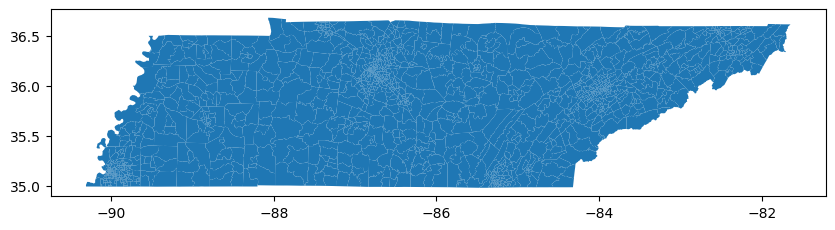

In [9]:
fig,ax = plt.subplots(figsize=(10,10))
shapefile.plot(ax=ax)

In [10]:
income_shp = gpd.read_file('../shape_census/acs2022_5yr_B19001_14000US47037015100.shp')

In [11]:
income_shp = income_shp.to_crs(crs_to_use)

In [12]:
income_shp

,geoid,name,B19001001,B19001001e,B19001002,B19001002e,B19001003,B19001003e,B19001004,B19001004e,...,B19001013e,B19001014,B19001014e,B19001015,B19001015e,B19001016,B19001016e,B19001017,B19001017e,geometry
0,04000US47,Tennessee,2713635.0,7405.0,144639.0,2807.0,122212.0,3595.0,111419.0,2673.0,...,4514.0,257232.0,4293.0,169567.0,3100.0,182209.0,3522.0,197980.0,3847.0,"POLYGON ((-83.98762 36.58947, -83.98724 36.589..."
1,14000US47001020100,"Census Tract 201, Anderson, TN",1531.0,225.0,156.0,90.0,74.0,52.0,41.0,42.0,...,53.0,125.0,79.0,16.0,18.0,46.0,33.0,11.0,16.0,"POLYGON ((-84.32016 35.99186, -84.32008 35.991..."
2,14000US47001020201,"Census Tract 202.01, Anderson, TN",2029.0,160.0,93.0,73.0,28.0,35.0,26.0,30.0,...,73.0,242.0,94.0,195.0,114.0,256.0,81.0,368.0,140.0,"POLYGON ((-84.24333 36.00161, -84.24330 36.001..."
3,14000US47001020202,"Census Tract 202.02, Anderson, TN",1951.0,235.0,235.0,127.0,159.0,126.0,7.0,13.0,...,97.0,134.0,77.0,129.0,106.0,295.0,146.0,122.0,67.0,"POLYGON ((-84.25132 36.00539, -84.25124 36.005..."
4,14000US47001020300,"Census Tract 203, Anderson, TN",1567.0,154.0,25.0,26.0,95.0,59.0,56.0,36.0,...,85.0,174.0,70.0,106.0,61.0,93.0,59.0,43.0,38.0,"POLYGON ((-84.24401 36.04229, -84.24090 36.044..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,14000US47189030905,"Census Tract 309.05, Wilson, TN",1925.0,288.0,38.0,64.0,0.0,19.0,0.0,19.0,...,268.0,254.0,100.0,326.0,129.0,297.0,99.0,249.0,129.0,"POLYGON ((-86.50228 36.09180, -86.50226 36.091..."
1698,14000US47189030906,"Census Tract 309.06, Wilson, TN",1963.0,244.0,0.0,19.0,21.0,35.0,17.0,30.0,...,163.0,142.0,131.0,209.0,102.0,164.0,129.0,486.0,161.0,"POLYGON ((-86.56794 36.16886, -86.56778 36.168..."
1699,14000US47189030907,"Census Tract 309.07, Wilson, TN",2513.0,276.0,109.0,89.0,60.0,58.0,59.0,68.0,...,251.0,304.0,114.0,130.0,67.0,330.0,144.0,162.0,90.0,"POLYGON ((-86.49634 36.14942, -86.49633 36.149..."
1700,14000US47189030908,"Census Tract 309.08, Wilson, TN",3124.0,432.0,133.0,92.0,61.0,102.0,46.0,52.0,...,182.0,566.0,249.0,279.0,167.0,510.0,235.0,421.0,259.0,"POLYGON ((-86.51625 36.15402, -86.51621 36.154..."


In [13]:
# tn_tract_shapes = income_shp.crs
# income_shp.plot()
# plt.show()

In [14]:
# fig,ax = plt.subplots(figsize=(10,10))
# income_shp.plot(ax=ax)

<Axes: >

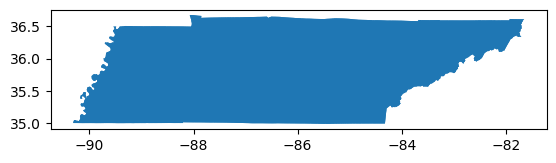

In [15]:
income_shp.plot()

the problem here was just that it was reading the first entry for TN lat/lon and not the census tracts within

In [16]:
tracts_shp = income_shp[income_shp['name']!='Tennessee']

<Axes: >

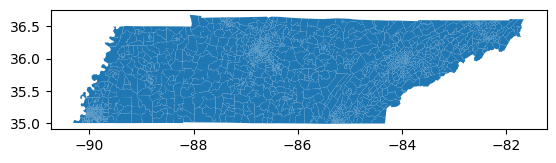

In [17]:
tracts_shp.plot()

In [18]:
pd.set_option('display.max_columns',None)


In [19]:
tracts_shp = tracts_shp.rename(columns={'B19001001':'total','B19001002':'less_than_10k','B19001003':'10k_to_14.9k','B19001004':'15k_to_19.9k','B19001005':'20k_to_24.9k','B19001006':'25k_to_29.9k','B19001007':'30k_to_34.9k','B19001008':'35k_to_39.9k','B19001009':'40k_to_44.9k','B19001010':'45k_to_49.9k','B19001011':'50k_to_59.9k','B19001012':'60k_to_74.9k','B19001013':'75k_to_99.9k','B19001014':'100k_to_124.9k','B19001015':'125k_to_149.9k','B19001016':'150k_to_199.9k','B19001017':'200k_or_more'})

In [20]:
tracts_shp = tracts_shp.drop(columns=['B19001001e','B19001002e','B19001003e','B19001004e','B19001005e','B19001006e','B19001007e','B19001008e','B19001009e','B19001010e','B19001011e','B19001012e','B19001013e','B19001014e','B19001015e','B19001016e','B19001017e'])
tracts_shp

,geoid,name,total,less_than_10k,10k_to_14.9k,15k_to_19.9k,20k_to_24.9k,25k_to_29.9k,30k_to_34.9k,35k_to_39.9k,40k_to_44.9k,45k_to_49.9k,50k_to_59.9k,60k_to_74.9k,75k_to_99.9k,100k_to_124.9k,125k_to_149.9k,150k_to_199.9k,200k_or_more,geometry
1,14000US47001020100,"Census Tract 201, Anderson, TN",1531.0,156.0,74.0,41.0,50.0,106.0,31.0,262.0,154.0,52.0,168.0,138.0,101.0,125.0,16.0,46.0,11.0,"POLYGON ((-84.32016 35.99186, -84.32008 35.991..."
2,14000US47001020201,"Census Tract 202.01, Anderson, TN",2029.0,93.0,28.0,26.0,74.0,24.0,0.0,54.0,89.0,86.0,151.0,219.0,124.0,242.0,195.0,256.0,368.0,"POLYGON ((-84.24333 36.00161, -84.24330 36.001..."
3,14000US47001020202,"Census Tract 202.02, Anderson, TN",1951.0,235.0,159.0,7.0,13.0,101.0,48.0,40.0,33.0,140.0,74.0,257.0,164.0,134.0,129.0,295.0,122.0,"POLYGON ((-84.25132 36.00539, -84.25124 36.005..."
4,14000US47001020300,"Census Tract 203, Anderson, TN",1567.0,25.0,95.0,56.0,30.0,84.0,65.0,74.0,46.0,53.0,173.0,170.0,280.0,174.0,106.0,93.0,43.0,"POLYGON ((-84.24401 36.04229, -84.24090 36.044..."
5,14000US47001020400,"Census Tract 204, Anderson, TN",1812.0,104.0,59.0,88.0,40.0,52.0,29.0,117.0,61.0,90.0,142.0,370.0,295.0,120.0,56.0,127.0,62.0,"POLYGON ((-84.29175 36.02379, -84.29149 36.023..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,14000US47189030905,"Census Tract 309.05, Wilson, TN",1925.0,38.0,0.0,0.0,36.0,0.0,17.0,24.0,63.0,61.0,32.0,88.0,440.0,254.0,326.0,297.0,249.0,"POLYGON ((-86.50228 36.09180, -86.50226 36.091..."
1698,14000US47189030906,"Census Tract 309.06, Wilson, TN",1963.0,0.0,21.0,17.0,28.0,0.0,60.0,0.0,68.0,35.0,175.0,279.0,279.0,142.0,209.0,164.0,486.0,"POLYGON ((-86.56794 36.16886, -86.56778 36.168..."
1699,14000US47189030907,"Census Tract 309.07, Wilson, TN",2513.0,109.0,60.0,59.0,30.0,83.0,89.0,34.0,29.0,0.0,145.0,304.0,645.0,304.0,130.0,330.0,162.0,"POLYGON ((-86.49634 36.14942, -86.49633 36.149..."
1700,14000US47189030908,"Census Tract 309.08, Wilson, TN",3124.0,133.0,61.0,46.0,0.0,182.0,41.0,33.0,72.0,9.0,94.0,232.0,445.0,566.0,279.0,510.0,421.0,"POLYGON ((-86.51625 36.15402, -86.51621 36.154..."


In [21]:
tracts_shp['pct_under_10k'] = round((tracts_shp['less_than_10k']/tracts_shp['total']*100),2)
tracts_shp['pct_10k_to_14.9k'] = round((tracts_shp['10k_to_14.9k']/tracts_shp['total']*100),2)
tracts_shp['pct_15k_to_19.9k'] = round((tracts_shp['15k_to_19.9k']/tracts_shp['total']*100),2)
tracts_shp['pct_20k_to_24.9k'] = round((tracts_shp['20k_to_24.9k']/tracts_shp['total']*100),2)
tracts_shp['pct_25k_to_29.9k'] = round((tracts_shp['25k_to_29.9k']/tracts_shp['total']*100),2)
tracts_shp['pct_30k_to_34.9k'] = round((tracts_shp['30k_to_34.9k']/tracts_shp['total']*100),2)
tracts_shp['pct_35k_to_39.9k'] = round((tracts_shp['35k_to_39.9k']/tracts_shp['total']*100),2)
tracts_shp['pct_40k_to_44.9k'] = round((tracts_shp['40k_to_44.9k']/tracts_shp['total']*100),2)
tracts_shp['pct_45k_to_49.9k'] = round((tracts_shp['45k_to_49.9k']/tracts_shp['total']*100),2)
tracts_shp['pct_50k_to_59.9k'] = round((tracts_shp['50k_to_59.9k']/tracts_shp['total']*100),2)
tracts_shp['pct_60k_to_74.9k'] = round((tracts_shp['60k_to_74.9k']/tracts_shp['total']*100),2)
tracts_shp['pct_75k_to_99.9k'] = round((tracts_shp['75k_to_99.9k']/tracts_shp['total']*100),2)
tracts_shp['pct_100k_to_124.9k'] = round((tracts_shp['100k_to_124.9k']/tracts_shp['total']*100),2)
tracts_shp['pct_125k_to_149.9k'] = round((tracts_shp['125k_to_149.9k']/tracts_shp['total']*100),2)
tracts_shp['pct_150k_to_199.9k'] = round((tracts_shp['150k_to_199.9k']/tracts_shp['total']*100),2)
tracts_shp['pct_200k_and_up'] = round((tracts_shp['200k_or_more']/tracts_shp['total']*100),2)


In [22]:
tracts_shp.head()

,geoid,name,total,less_than_10k,10k_to_14.9k,15k_to_19.9k,20k_to_24.9k,25k_to_29.9k,30k_to_34.9k,35k_to_39.9k,40k_to_44.9k,45k_to_49.9k,50k_to_59.9k,60k_to_74.9k,75k_to_99.9k,100k_to_124.9k,125k_to_149.9k,150k_to_199.9k,200k_or_more,geometry,pct_under_10k,pct_10k_to_14.9k,pct_15k_to_19.9k,pct_20k_to_24.9k,pct_25k_to_29.9k,pct_30k_to_34.9k,pct_35k_to_39.9k,pct_40k_to_44.9k,pct_45k_to_49.9k,pct_50k_to_59.9k,pct_60k_to_74.9k,pct_75k_to_99.9k,pct_100k_to_124.9k,pct_125k_to_149.9k,pct_150k_to_199.9k,pct_200k_and_up
1,14000US47001020100,"Census Tract 201, Anderson, TN",1531.0,156.0,74.0,41.0,50.0,106.0,31.0,262.0,154.0,52.0,168.0,138.0,101.0,125.0,16.0,46.0,11.0,"POLYGON ((-84.32016 35.99186, -84.32008 35.991...",10.19,4.83,2.68,3.27,6.92,2.02,17.11,10.06,3.40,10.97,9.01,6.60,8.16,1.05,3.00,0.72
2,14000US47001020201,"Census Tract 202.01, Anderson, TN",2029.0,93.0,28.0,26.0,74.0,24.0,0.0,54.0,89.0,86.0,151.0,219.0,124.0,242.0,195.0,256.0,368.0,"POLYGON ((-84.24333 36.00161, -84.24330 36.001...",4.58,1.38,1.28,3.65,1.18,0.00,2.66,4.39,4.24,7.44,10.79,6.11,11.93,9.61,12.62,18.14
3,14000US47001020202,"Census Tract 202.02, Anderson, TN",1951.0,235.0,159.0,7.0,13.0,101.0,48.0,40.0,33.0,140.0,74.0,257.0,164.0,134.0,129.0,295.0,122.0,"POLYGON ((-84.25132 36.00539, -84.25124 36.005...",12.05,8.15,0.36,0.67,5.18,2.46,2.05,1.69,7.18,3.79,13.17,8.41,6.87,6.61,15.12,6.25
4,14000US47001020300,"Census Tract 203, Anderson, TN",1567.0,25.0,95.0,56.0,30.0,84.0,65.0,74.0,46.0,53.0,173.0,170.0,280.0,174.0,106.0,93.0,43.0,"POLYGON ((-84.24401 36.04229, -84.24090 36.044...",1.60,6.06,3.57,1.91,5.36,4.15,4.72,2.94,3.38,11.04,10.85,17.87,11.10,6.76,5.93,2.74
5,14000US47001020400,"Census Tract 204, Anderson, TN",1812.0,104.0,59.0,88.0,40.0,52.0,29.0,117.0,61.0,90.0,142.0,370.0,295.0,120.0,56.0,127.0,62.0,"POLYGON ((-84.29175 36.02379, -84.29149 36.023...",5.74,3.26,4.86,2.21,2.87,1.60,6.46,3.37,4.97,7.84,20.42,16.28,6.62,3.09,7.01,3.42


In [23]:
tracts_shp['under_20_pct'] = tracts_shp['pct_under_10k'] + tracts_shp['pct_10k_to_14.9k'] + tracts_shp['pct_15k_to_19.9k']

<Axes: >

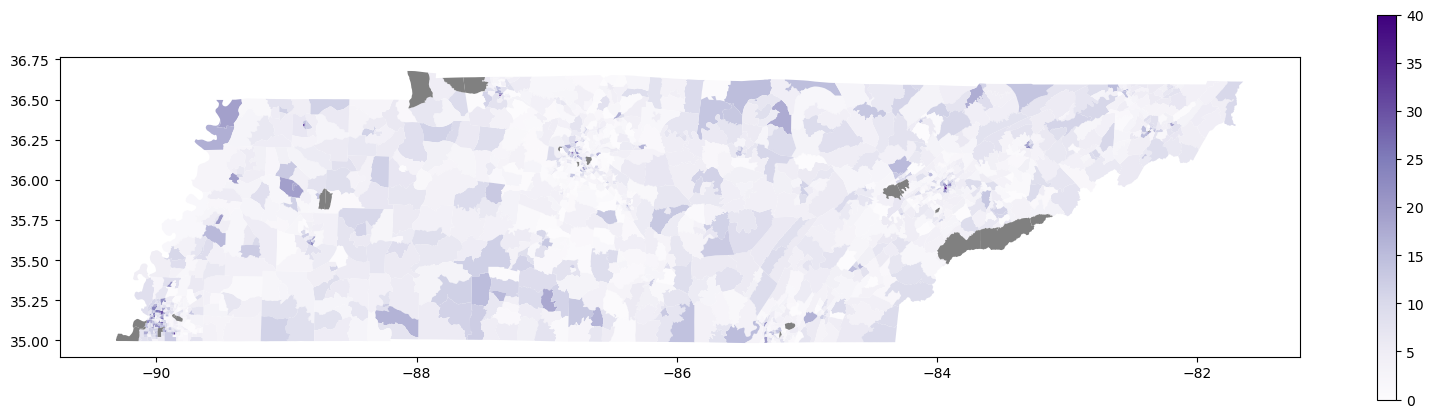

In [64]:
tracts_shp.plot(column='pct_under_10k', legend=True, cmap='Purples', vmin=0,vmax=40, figsize=(20, 5), missing_kwds={'color':'gray'})

<Axes: >

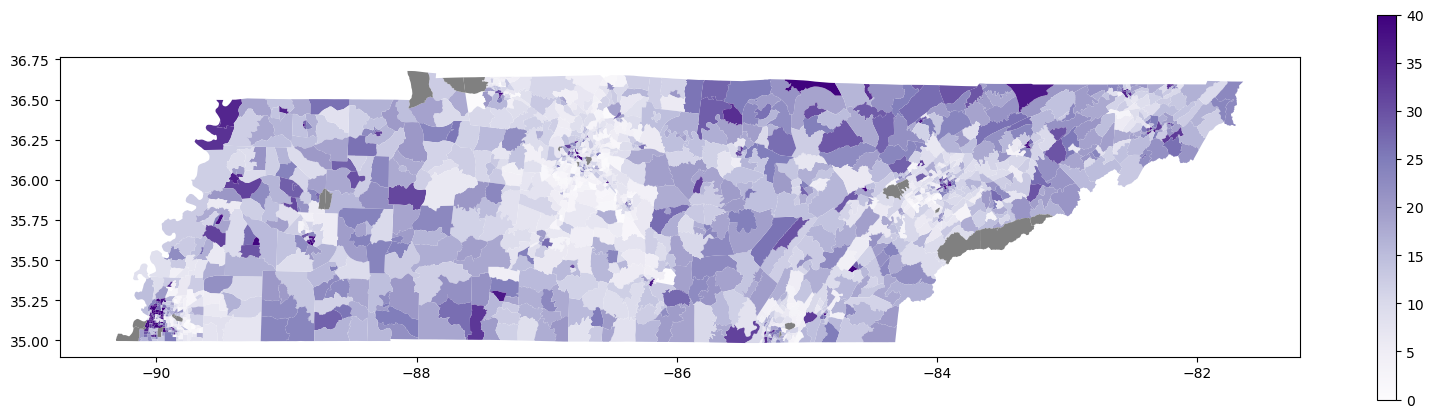

In [57]:
tracts_shp.plot(column='under_20_pct', legend=True, cmap='Purples', vmin=0,vmax=40, figsize=(20,5), missing_kwds={'color':'gray'})

<Axes: >

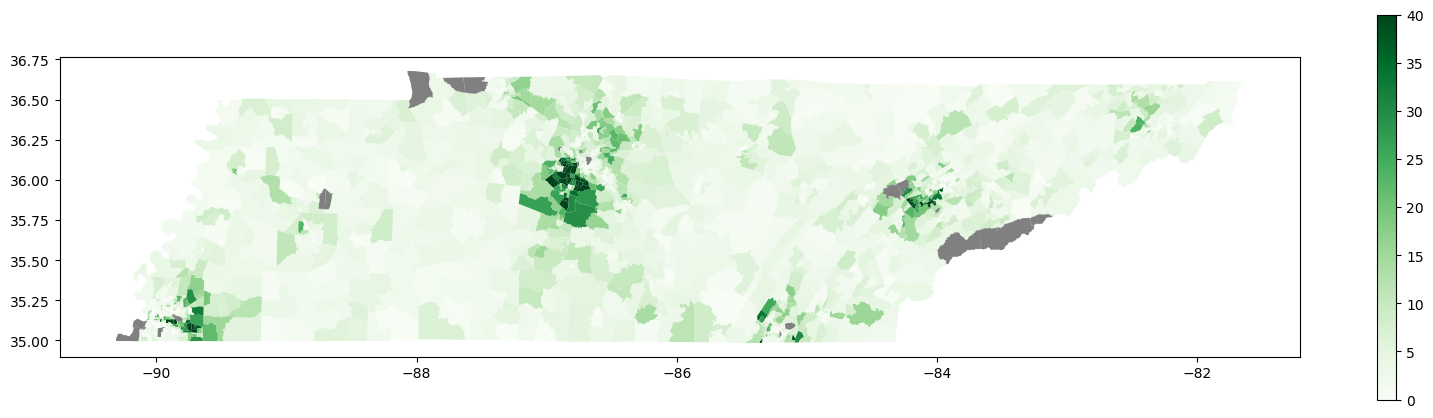

In [78]:
tracts_shp.plot(column='pct_200k_and_up', legend=True, cmap='Greens', vmin=0,vmax=40, figsize=(20,5), missing_kwds={'color':'gray'})

In [27]:
pip install openpyxl

In [28]:
food_csv = pd.read_excel('../data/tn_food_access_geoid.xlsx')

In [29]:
census_food_merged = tracts_shp.merge(food_csv, how='left', on='geoid')

In [30]:
census_food_merged.head()

,geoid,name,total,less_than_10k,10k_to_14.9k,15k_to_19.9k,20k_to_24.9k,25k_to_29.9k,30k_to_34.9k,35k_to_39.9k,40k_to_44.9k,45k_to_49.9k,50k_to_59.9k,60k_to_74.9k,75k_to_99.9k,100k_to_124.9k,125k_to_149.9k,150k_to_199.9k,200k_or_more,geometry,pct_under_10k,pct_10k_to_14.9k,pct_15k_to_19.9k,pct_20k_to_24.9k,pct_25k_to_29.9k,pct_30k_to_34.9k,pct_35k_to_39.9k,pct_40k_to_44.9k,pct_45k_to_49.9k,pct_50k_to_59.9k,pct_60k_to_74.9k,pct_75k_to_99.9k,pct_100k_to_124.9k,pct_125k_to_149.9k,pct_150k_to_199.9k,pct_200k_and_up,under_20_pct,ct_long,county,county_and_state,region,state,country,Urban,Pop2010,OHU2010,TractLOWI,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,LowIncomeTracts,PovertyRate,MedianFamilyIncome,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,HUNVFlag,LA1and10,LAhalfand10,LA1and20,LATracts_half,LATracts1,LATracts10,LATracts20,LATractsVehicle_20,LAPOP1_10,LAPOP05_10,LAPOP1_20,LALOWI1_10,LALOWI05_10,LALOWI1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share
0,14000US47001020100,"Census Tract 201, Anderson, TN",1531.0,156.0,74.0,41.0,50.0,106.0,31.0,262.0,154.0,52.0,168.0,138.0,101.0,125.0,16.0,46.0,11.0,"POLYGON ((-84.32016 35.99186, -84.32008 35.991...",10.19,4.83,2.68,3.27,6.92,2.02,17.11,10.06,3.40,10.97,9.01,6.60,8.16,1.05,3.00,0.72,17.70,4.700102e+10,Anderson,"Anderson, Tennessee",East,Tennessee,United States of America,1.0,3111.0,1546.0,1381.0,706.0,384.0,1969.0,853.0,130.0,2.0,9.0,148.0,145.0,206.0,438.0,1.0,21.8,48973.0,0.0,6.0,0.19,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,161.0,1286.0,161.0,72.0,545.0,72.0,1286.0,41.34,545.0,17.52,287.0,9.22,201.0,6.47,617.0,19.85,586.0,18.83,29.0,0.94,1.0,0.02,4.0,0.13,49.0,1.57,29.0,0.94,78.0,5.04,170.0,11.02,161.0,5.17,72.0,2.33,34.0,1.09,36.0,1.17,66.0,2.12,85.0,2.72,3.0,0.11,0.0,0.00,1.0,0.02,6.0,0.20,1.0,0.02,10.0,0.63,21.0,1.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14000US47001020201,"Census Tract 202.01, Anderson, TN",2029.0,93.0,28.0,26.0,74.0,24.0,0.0,54.0,89.0,86.0,151.0,219.0,124.0,242.0,195.0,256.0,368.0,"POLYGON ((-84.24333 36.00161, -84.24330 36.001...",4.58,1.38,1.28,3.65,1.18,0.00,2.66,4.39,4.24,7.44,10.79,6.11,11.93,9.61,12.62,18.14,7.24,4.700102e+10,Anderson,"Anderson, Tennessee",East,Tennessee,United States of America,1.0,3670.0,1535.0,604.0,778.0,658.0,3158.0,144.0,256.0,0.0,6.0,106.0,84.0,49.0,31.0,0.0,4.1,124194.0,0.0,103.0,2.81,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1130.0,2333.0,1130.0,190.0,367.0,190.0,2333.0,63.56,367.0,9.99,529.0,14.41,405.0,11.02,2065.0,56.27,70.0,1.90,149.0,4.07,0.0,0.00,2.0,0.07,46.0,1.26,51.0,1.38,29.0,1.87,17.0,1.12,1130.0,30.78,190.0,5.19,291.0,7.92,156.0,4.26,1005.0,27.38,33.0,0.90,70.0,1.91,0.0,0.00,1.0,0.03,20.0,0.56,28.0,0.76,17.0,1.08,8.0,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14000US47001020202,"Census Tract 202.02, A

In [31]:
census_food_merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1701 entries, 0 to 1700
Columns: 161 entries, geoid to lasnap10share
dtypes: float64(153), geometry(1), object(7)
memory usage: 2.1+ MB


<Axes: >

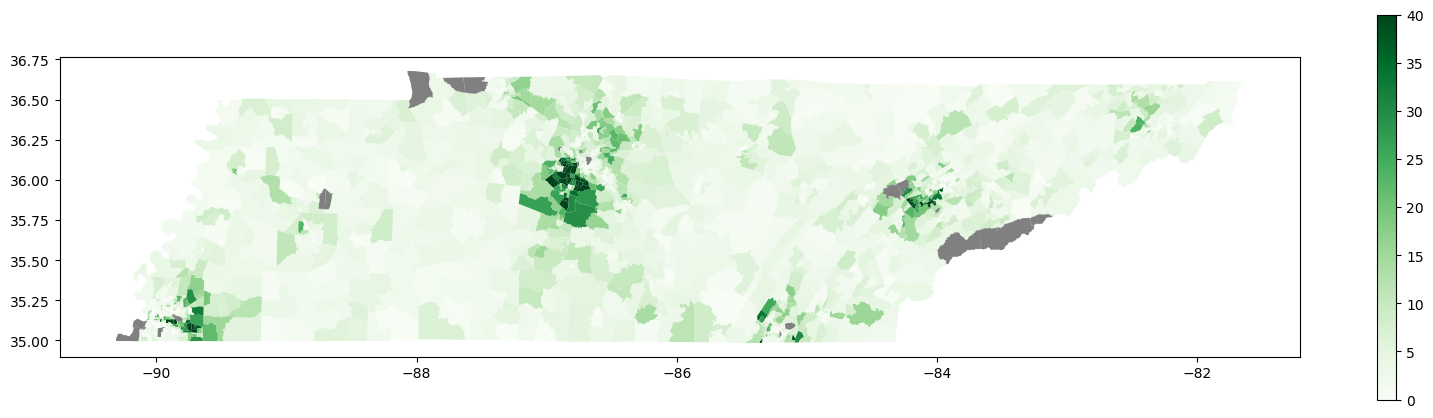

In [77]:
census_food_merged.plot(column='pct_200k_and_up', legend=True, cmap='Greens', vmin=0,vmax=40, figsize=(20,5), missing_kwds={'color':'gray'})

In [33]:
census_food_merged['pct_LOWI'] = round((census_food_merged['TractLOWI']/census_food_merged['Pop2010']*100),2)
census_food_merged['pct_kids'] = round((census_food_merged['TractKids']/census_food_merged['Pop2010']*100),2)
census_food_merged['pct_seniors'] = round((census_food_merged['TractSeniors']/census_food_merged['Pop2010']*100),2)
census_food_merged['pct_white'] = round((census_food_merged['TractWhite']/census_food_merged['Pop2010']*100),2)
census_food_merged['pct_black'] = round((census_food_merged['TractBlack']/census_food_merged['Pop2010']*100),2)
census_food_merged['pct_asian'] = round((census_food_merged['TractAsian']/census_food_merged['Pop2010']*100),2)
census_food_merged['pct_pac_isl'] = round((census_food_merged['TractNHOPI']/census_food_merged['Pop2010']*100),2)
census_food_merged['pct_aian'] = round((census_food_merged['TractAIAN']/census_food_merged['Pop2010']*100),2)
census_food_merged['pct_o_multir'] = round((census_food_merged['TractOMultir']/census_food_merged['Pop2010']*100),2)
census_food_merged['pct_hispanic'] = round((census_food_merged['TractHispanic']/census_food_merged['Pop2010']*100),2)
census_food_merged['pct_no_vehicle'] = round((census_food_merged['TractHUNV']/census_food_merged['OHU2010']*100),2)
census_food_merged['pct_lapop1_10'] = round((census_food_merged['LAPOP1_10']/census_food_merged['Pop2010']*100),2)
census_food_merged['pct_lapop05_10'] = round((census_food_merged['LAPOP05_10']/census_food_merged['Pop2010']*100),2)
census_food_merged['pct_lapop1_20'] = round((census_food_merged['LAPOP1_20']/census_food_merged['Pop2010']*100),2)
census_food_merged['pct_lalowi1_10'] = round((census_food_merged['LALOWI1_10']/census_food_merged['Pop2010']*100),2)
census_food_merged['pct_lalowi05_10'] = round((census_food_merged['LALOWI05_10']/census_food_merged['Pop2010']*100),2)
census_food_merged['pct_lalowi1_20'] = round((census_food_merged['LALOWI1_20']/census_food_merged['Pop2010']*100),2)

In [34]:
census_food_merged['pct_ohu_snap'] = round((census_food_merged['TractSNAP']/census_food_merged['OHU2010']*100),2)

<Axes: >

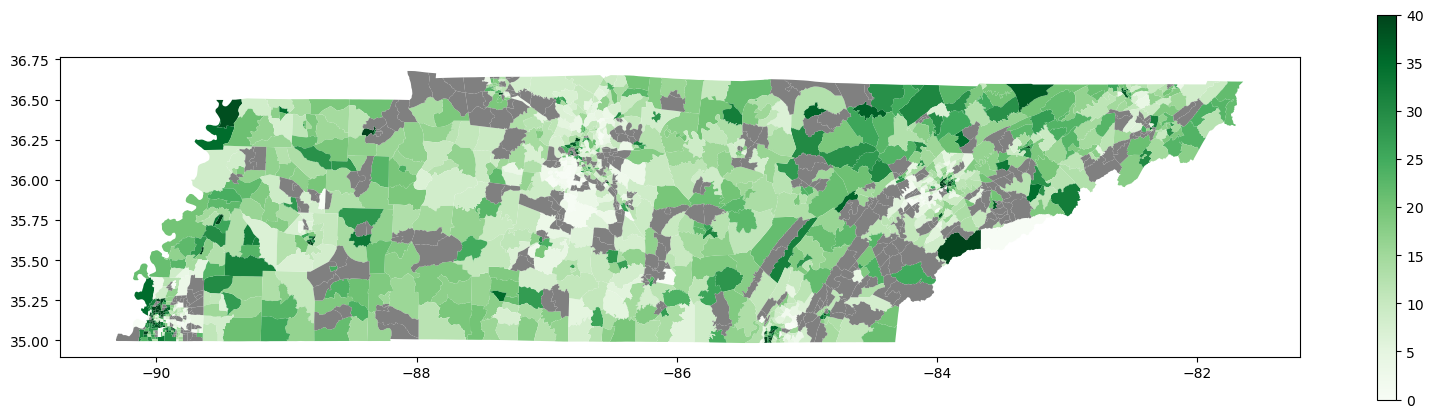

In [76]:
census_food_merged.plot(column='pct_ohu_snap', legend=True, figsize=(20,5), cmap='Greens', vmin=0,vmax=40,missing_kwds={'color':'gray'})

<Axes: >

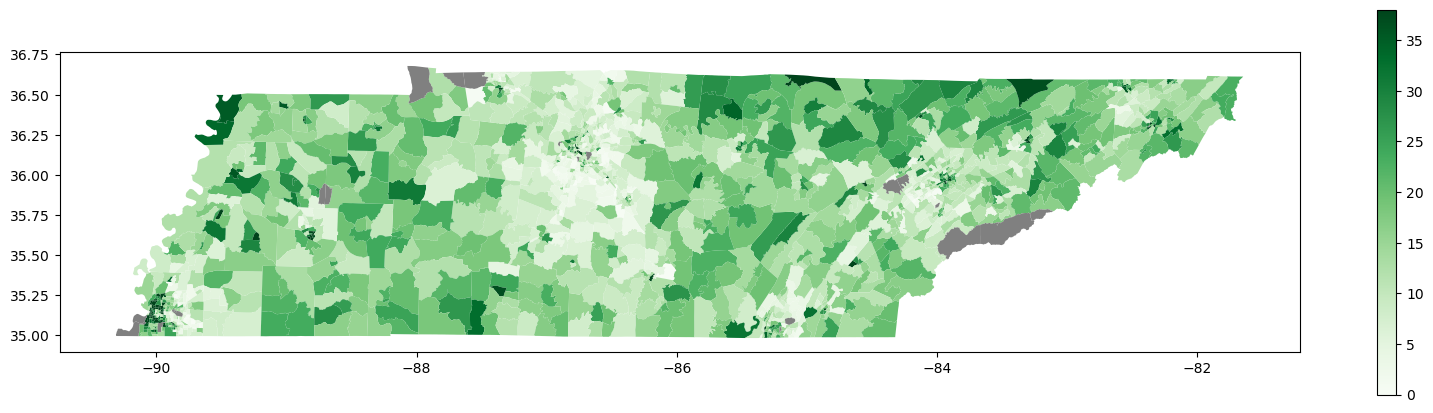

In [75]:
census_food_merged.plot(column='under_20_pct', legend=True, figsize=(20,5),cmap='Greens', vmin=0,vmax=38,missing_kwds={'color':'gray'})

<Axes: >

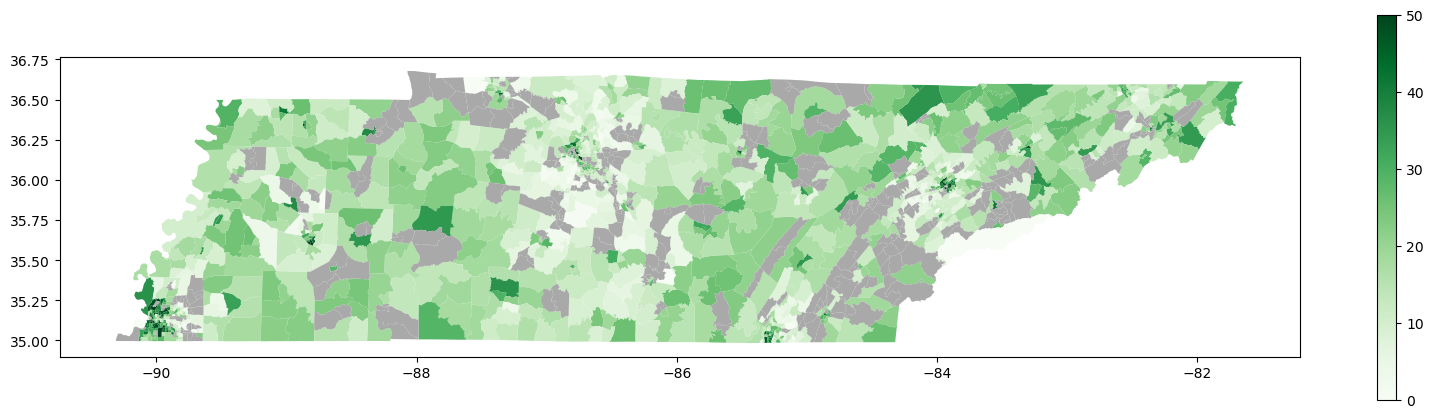

In [74]:
census_food_merged.plot(column='PovertyRate', legend=True, figsize=(20,5),cmap='Greens', vmin=0,vmax=50,missing_kwds={'color':'darkgray'})

<Axes: >

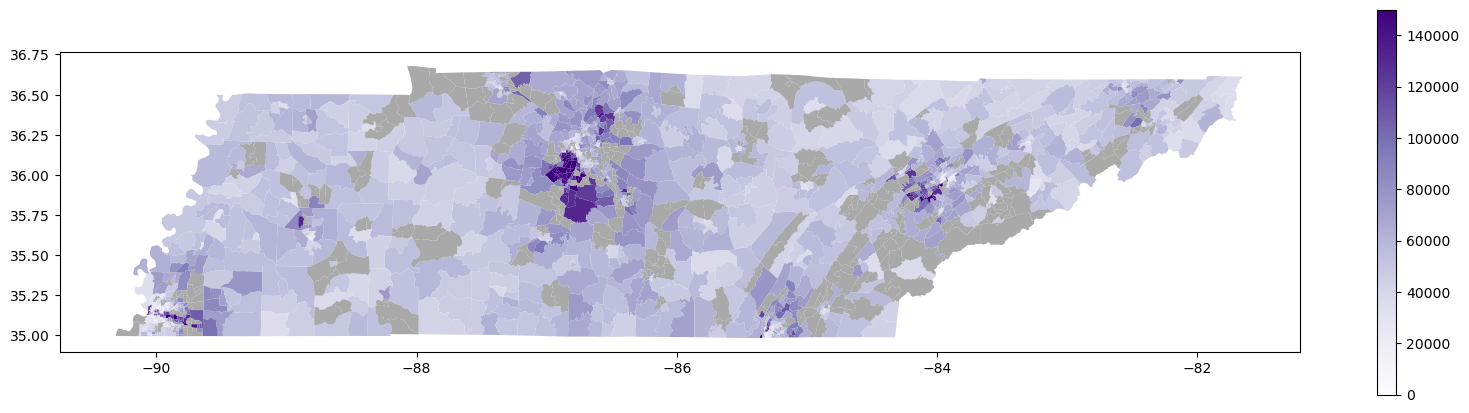

In [72]:
census_food_merged.plot(column='MedianFamilyIncome', legend=True, figsize=(20,5),cmap='Purples', vmin=0,vmax=150000,missing_kwds={'color':'darkgray'})

<Axes: >

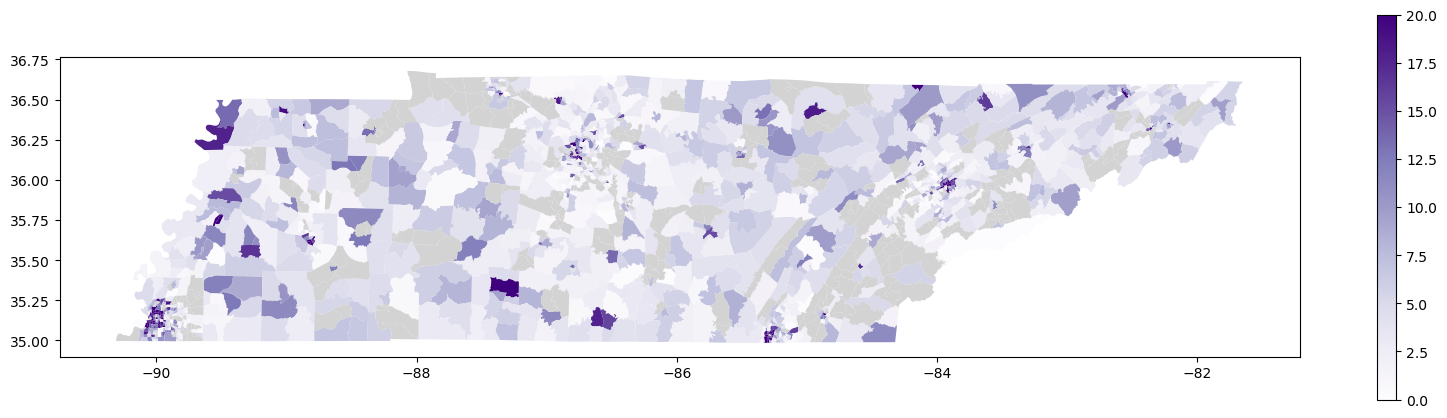

In [71]:
census_food_merged.plot(column='pct_no_vehicle', legend=True, figsize=(20,5),cmap='Purples', vmin=0,vmax=20,missing_kwds={'color':'lightgray'})

In [38]:
# import geoplot
# import geoplot.crs as gcrs

# # Plot points
# ax = census_food_merged.kdeplot('under_20_pct', shade=True, alpha=0.7)
# # Plot polygons
# geoplot.polyplot(df_map, ax=ax)